In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Bd = pd.read_csv("Behaviour_Data.csv")
Od= pd.read_csv('Originations_Data.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_27768\3076483585.py:2: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Od= pd.read_csv('Originations_Data.csv')


In [3]:
Bd

,Loan Sequence Number,Delinquency_Bucket 201802,Delinquency_Bucket 201803,Delinquency_Bucket 201804,Delinquency_Bucket 201805,Delinquency_Bucket 201806,Delinquency_Bucket 201807,Delinquency_Bucket 201808,Delinquency_Bucket 201809,Delinquency_Bucket 201810,...,Delinquency_Bucket 202107,Delinquency_Bucket 202108,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate
0,F18Q10000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,F18Q10000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,F18Q10000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F18Q10000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,F18Q10000140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149992,F20Q41284801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149993,F20Q41284863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
149994,F20Q41284881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
149995,F20Q41284975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [4]:
def CycleBreak(row):
    for col in Bd.columns:
        if row[col] == 3:
            return col
    return None           

In [5]:
Bd['CycleBreak'] = Bd.apply(CycleBreak, axis=1)

In [6]:
Cbreakers = Bd.groupby('CycleBreak')['Loan Sequence Number'].count()
Cbreakers.sum()

5552

In [7]:
Bd['AccountType'] = Bd['CycleBreak'].apply(lambda x: "Good" if x==None else "Bad")

In [8]:
merged = Od.merge(Bd,on='Loan Sequence Number',how='inner')

In [9]:
merged

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,CycleBreak,AccountType
0,654,201803,N,204802,NaN,0,1,P,77,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
1,693,201803,N,203302,24340.0,0,1,P,80,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
2,757,201803,Y,204802,NaN,25,1,P,97,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
3,807,201803,N,203302,NaN,0,1,P,26,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
4,812,201803,N,203302,19340.0,0,1,P,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141727,806,202012,N,204011,11244.0,0,1,P,49,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
141728,785,202012,N,204011,35004.0,0,1,P,63,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
141729,730,202012,N,203511,15680.0,0,1,P,52,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
141730,691,202012,N,205011,35980.0,25,1,P,97,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good


In [10]:
def date_extract(x):
    if x is None:
        return None
    else:
        return x[19:26]

In [11]:
merged['CycleBreak'] = merged['CycleBreak'].apply(date_extract)

In [12]:
merged[merged['LossEstimate']!=0]

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,CycleBreak,AccountType
34,689,201803,Y,204802,13460.0,25,1,P,90,45,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,213851.9475,202007,Bad
104,781,201804,N,203803,37900.0,0,1,P,80,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95620.3650,202006,Bad
153,771,201803,N,204802,14860.0,12,1,I,85,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160690.2150,202006,Bad
284,703,201803,N,204802,41420.0,30,1,P,95,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197818.3650,202007,Bad
293,693,201803,N,204802,21660.0,0,1,P,80,43,...,18.0,19.0,19.0,20.0,20.0,21.0,22.0,202572.4425,202006,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140863,800,202012,N,205011,38900.0,0,1,I,75,21,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,338679.0450,202104,Bad
141196,655,202012,N,203511,12580.0,0,1,P,69,39,...,5.0,6.0,7.0,8.0,9.0,10.0,11.0,154500.0000,202107,Bad
141266,764,202012,N,205011,16984.0,12,2,P,85,40,...,5.0,6.0,4.0,0.0,1.0,0.0,0.0,235347.7650,202107,Bad
141472,668,202012,N,205011,45300.0,25,1,P,90,41,...,3.0,4.0,5.0,6.0,6.0,6.0,0.0,167390.2950,202109,Bad


In [13]:
merged['CycleBreak'] = merged['CycleBreak'].astype(str)

In [14]:
def dateformating(x):
    if x == "None":
        return None
    else:
        return pd.to_datetime(x, format='%Y%m').date()

In [15]:
merged['CycleBreak'] = merged['CycleBreak'].apply(dateformating)

In [16]:
merged['First Payment Date'] = merged['First Payment Date'].astype(str)

In [17]:
merged['First Payment Date'] = merged['First Payment Date'].apply(lambda x: pd.to_datetime(x,format='%Y%m').date())

In [18]:
merged.head()

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,CycleBreak,AccountType
0,654,2018-03-01,N,204802,NaN,0,1,P,77,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
1,693,2018-03-01,N,203302,24340.0,0,1,P,80,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
2,757,2018-03-01,Y,204802,NaN,25,1,P,97,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
3,807,2018-03-01,N,203302,NaN,0,1,P,26,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
4,812,2018-03-01,N,203302,19340.0,0,1,P,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good


In [19]:
merged['AccountType'].value_counts()

AccountType
Good    136216
Bad       5516
Name: count, dtype: int64

In [20]:
merged[['First Payment Date','CycleBreak']]

,First Payment Date,CycleBreak
0,2018-03-01,None
1,2018-03-01,None
2,2018-03-01,None
3,2018-03-01,None
4,2018-03-01,None
...,...,...
141727,2020-12-01,None
141728,2020-12-01,None
141729,2020-12-01,None
141730,2020-12-01,None


In [21]:
merged['Diff'] = (merged['CycleBreak'] - merged['First Payment Date']) 

In [22]:
merged[merged['LossEstimate']!=0]

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,CycleBreak,AccountType,Diff
34,689,2018-03-01,Y,204802,13460.0,25,1,P,90,45,...,0.0,NaN,NaN,NaN,NaN,NaN,213851.9475,2020-07-01,Bad,"853 days, 0:00:00"
104,781,2018-04-01,N,203803,37900.0,0,1,P,80,47,...,0.0,0.0,0.0,0.0,0.0,0.0,95620.3650,2020-06-01,Bad,"792 days, 0:00:00"
153,771,2018-03-01,N,204802,14860.0,12,1,I,85,48,...,NaN,NaN,NaN,NaN,NaN,NaN,160690.2150,2020-06-01,Bad,"823 days, 0:00:00"
284,703,2018-03-01,N,204802,41420.0,30,1,P,95,45,...,0.0,0.0,0.0,0.0,0.0,0.0,197818.3650,2020-07-01,Bad,"853 days, 0:00:00"
293,693,2018-03-01,N,204802,21660.0,0,1,P,80,43,...,19.0,19.0,20.0,20.0,21.0,22.0,202572.4425,2020-06-01,Bad,"823 days, 0:00:00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140863,800,2020-12-01,N,205011,38900.0,0,1,I,75,21,...,0.0,0.0,0.0,NaN,NaN,NaN,338679.0450,2021-04-01,Bad,"121 days, 0:00:00"
141196,655,2020-12-01,N,203511,12580.0,0,1,P,69,39,...,6.0,7.0,8.0,9.0,10.0,11.0,154500.0000,2021-07-01,Bad,"212 days, 0:00:00"
141266,764,2020-12-01,N,205011,16984.0,12,2,P,85,40,...,6.0,4.0,0.0,1.0,0.0,0.0,235347.7650,2021-07-01,Bad,"212 days, 0:00:00"
141472,668,2020-12-01,N,205011,45300.0,25,1,P,90,41,...,4.0,5.0,6.0,6.0,6.0,0.0,167390.2950,2021-09-01,Bad,"274 days, 0:00:00"


In [23]:
merged['Diff'] = merged['Diff'].astype(str)

In [24]:
def day_month(x):
    if x == 'nan':
        return 0.00
    else:
        return float(x.split(",")[0].split(" ")[0])        

In [25]:
merged['Month'] = merged['Diff'].apply(day_month)

In [26]:
def monthextract(x):
    if x==0:
        return 0.00
    else:
        return round(x/30.4,0)

In [27]:
merged['Month'] = merged['Month'].apply(monthextract)

In [28]:
merged['Month'].value_counts().sort_index()

Month
0.0     136216
2.0        130
3.0        151
4.0        172
5.0        202
6.0        211
7.0        183
8.0        173
9.0        188
10.0       219
11.0       196
12.0       230
13.0       219
14.0       222
15.0       192
16.0       205
17.0       205
18.0       206
19.0       189
20.0       159
21.0       194
22.0       183
23.0       198
24.0       196
25.0       221
26.0       194
27.0       155
28.0       103
29.0        74
30.0        48
31.0        47
32.0        47
33.0        31
34.0        39
35.0        27
36.0        26
37.0        14
38.0         7
39.0        13
40.0        11
41.0        10
42.0         7
43.0         8
44.0         7
46.0         2
47.0         2
Name: count, dtype: int64

In [29]:
merged

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,CycleBreak,AccountType,Diff,Month
0,654,2018-03-01,N,204802,NaN,0,1,P,77,35,...,NaN,NaN,NaN,NaN,NaN,0.0,None,Good,nan,0.0
1,693,2018-03-01,N,203302,24340.0,0,1,P,80,41,...,NaN,NaN,NaN,NaN,NaN,0.0,None,Good,nan,0.0
2,757,2018-03-01,Y,204802,NaN,25,1,P,97,10,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0
3,807,2018-03-01,N,203302,NaN,0,1,P,26,38,...,NaN,NaN,NaN,NaN,NaN,0.0,None,Good,nan,0.0
4,812,2018-03-01,N,203302,19340.0,0,1,P,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141727,806,2020-12-01,N,204011,11244.0,0,1,P,49,37,...,NaN,NaN,NaN,NaN,NaN,0.0,None,Good,nan,0.0
141728,785,2020-12-01,N,204011,35004.0,0,1,P,63,20,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0
141729,730,2020-12-01,N,203511,15680.0,0,1,P,52,47,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0
141730,691,2020-12-01,N,205011,35980.0,25,1,P,97,42,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0


In [30]:
merged

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,CycleBreak,AccountType,Diff,Month
0,654,2018-03-01,N,204802,NaN,0,1,P,77,35,...,NaN,NaN,NaN,NaN,NaN,0.0,None,Good,nan,0.0
1,693,2018-03-01,N,203302,24340.0,0,1,P,80,41,...,NaN,NaN,NaN,NaN,NaN,0.0,None,Good,nan,0.0
2,757,2018-03-01,Y,204802,NaN,25,1,P,97,10,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0
3,807,2018-03-01,N,203302,NaN,0,1,P,26,38,...,NaN,NaN,NaN,NaN,NaN,0.0,None,Good,nan,0.0
4,812,2018-03-01,N,203302,19340.0,0,1,P,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141727,806,2020-12-01,N,204011,11244.0,0,1,P,49,37,...,NaN,NaN,NaN,NaN,NaN,0.0,None,Good,nan,0.0
141728,785,2020-12-01,N,204011,35004.0,0,1,P,63,20,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0
141729,730,2020-12-01,N,203511,15680.0,0,1,P,52,47,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0
141730,691,2020-12-01,N,205011,35980.0,25,1,P,97,42,...,0.0,0.0,0.0,0.0,0.0,0.0,None,Good,nan,0.0


In [31]:
merged.groupby('First Payment Date')['Month'].max()

First Payment Date
2018-03-01    47.0
2018-04-01    47.0
2018-05-01    43.0
2018-06-01    44.0
2018-07-01    44.0
2018-08-01    43.0
2018-09-01    42.0
2018-10-01    41.0
2018-11-01    39.0
2018-12-01    39.0
2019-01-01    37.0
2019-02-01    35.0
2019-03-01    36.0
2019-04-01    35.0
2019-05-01    34.0
2019-06-01    33.0
2019-07-01    28.0
2019-08-01    31.0
2019-09-01    30.0
2019-10-01    28.0
2019-11-01    26.0
2019-12-01    27.0
2020-01-01    26.0
2020-02-01    24.0
2020-03-01    24.0
2020-04-01    23.0
2020-05-01    21.0
2020-06-01    21.0
2020-07-01    20.0
2020-08-01    19.0
2020-09-01    18.0
2020-10-01    17.0
2020-11-01    16.0
2020-12-01    13.0
Name: Month, dtype: float64

In [32]:
BadAcc = merged[merged['AccountType']=='Bad']

In [33]:
BadAcc

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,CycleBreak,AccountType,Diff,Month
8,705,2018-03-01,Y,204802,17820.0,30,1,P,95,9,...,0.0,0.0,0.0,0.0,0.0,0.0000,2021-01-01,Bad,"1037 days, 0:00:00",34.0
34,689,2018-03-01,Y,204802,13460.0,25,1,P,90,45,...,NaN,NaN,NaN,NaN,NaN,213851.9475,2020-07-01,Bad,"853 days, 0:00:00",28.0
65,748,2018-04-01,N,204803,37900.0,12,1,P,85,31,...,0.0,0.0,0.0,0.0,0.0,0.0000,2020-06-01,Bad,"792 days, 0:00:00",26.0
71,686,2018-03-01,Y,204802,38900.0,30,1,P,95,45,...,NaN,NaN,NaN,NaN,NaN,0.0000,2020-07-01,Bad,"853 days, 0:00:00",28.0
85,798,2018-03-01,N,204802,46520.0,0,1,P,59,50,...,0.0,0.0,NaN,NaN,NaN,0.0000,2020-07-01,Bad,"853 days, 0:00:00",28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141028,720,2020-12-01,N,205011,38060.0,0,2,I,60,24,...,0.0,1.0,0.0,0.0,1.0,0.0000,2021-09-01,Bad,"274 days, 0:00:00",9.0
141196,655,2020-12-01,N,203511,12580.0,0,1,P,69,39,...,7.0,8.0,9.0,10.0,11.0,154500.0000,2021-07-01,Bad,"212 days, 0:00:00",7.0
141266,764,2020-12-01,N,205011,16984.0,12,2,P,85,40,...,4.0,0.0,1.0,0.0,0.0,235347.7650,2021-07-01,Bad,"212 days, 0:00:00",7.0
141472,668,2020-12-01,N,205011,45300.0,25,1,P,90,41,...,5.0,6.0,6.0,6.0,0.0,167390.2950,2021-09-01,Bad,"274 days, 0:00:00",9.0


In [34]:
BadAcc.groupby('First Payment Date')['Month'].mean()

First Payment Date
2018-03-01    28.251429
2018-04-01    27.104478
2018-05-01    25.627193
2018-06-01    25.247706
2018-07-01    24.630332
2018-08-01    23.522523
2018-09-01    22.557789
2018-10-01    21.395122
2018-11-01    20.977778
2018-12-01    20.807175
2019-01-01    19.028846
2019-02-01    18.374269
2019-03-01    17.603448
2019-04-01    16.565217
2019-05-01    15.859649
2019-06-01    14.653409
2019-07-01    13.382488
2019-08-01    13.287671
2019-09-01    12.111702
2019-10-01    10.117318
2019-11-01    10.080214
2019-12-01     8.904306
2020-01-01     7.594286
2020-02-01     6.525822
2020-03-01     5.931973
2020-04-01     6.088000
2020-05-01     5.817610
2020-06-01     7.450000
2020-07-01     8.413793
2020-08-01     6.753846
2020-09-01     7.882353
2020-10-01     9.243243
2020-11-01     7.500000
2020-12-01     8.105263
Name: Month, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_27768\3023988245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BadAcc['First Payment Date'] = pd.to_datetime(BadAcc['First Payment Date'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_27768\3023988245.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='First Payment Date', y='Month', data=grouped_data,marker='o',palette='Set2')


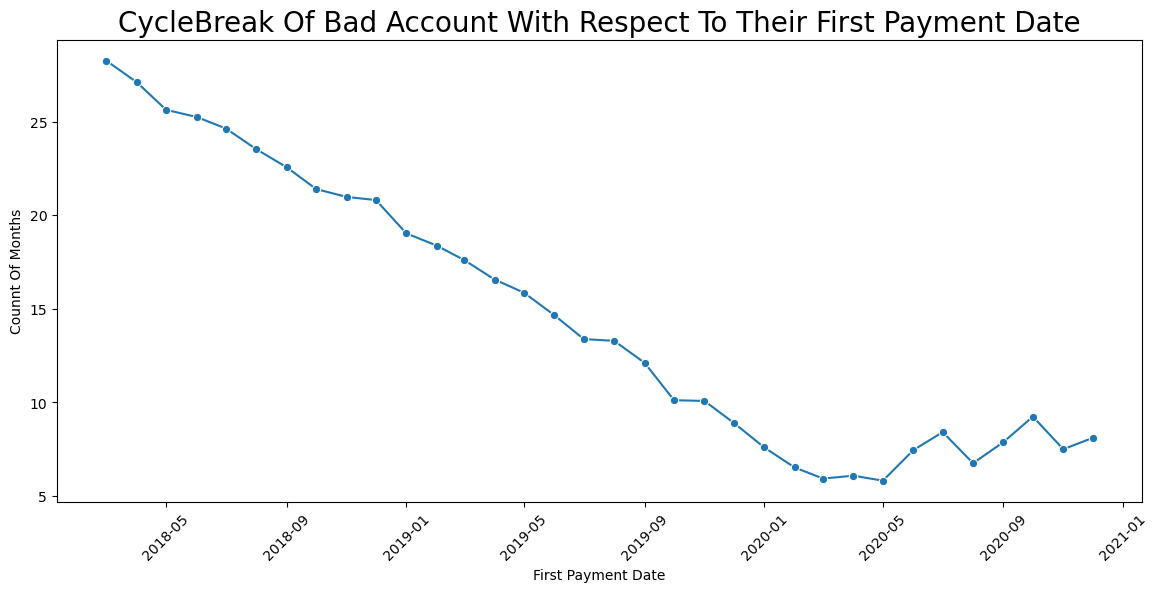

In [52]:
BadAcc['First Payment Date'] = pd.to_datetime(BadAcc['First Payment Date'])


grouped_data = BadAcc.groupby('First Payment Date')['Month'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='First Payment Date', y='Month', data=grouped_data,marker='o',palette='Set2')
plt.title('CycleBreak Of Bad Account With Respect To Their First Payment Date',fontsize=20)
plt.xlabel('First Payment Date')
plt.ylabel('Counnt Of Months')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [41]:
BadAcc['FirstPaymentDateWords'] = BadAcc['First Payment Month'] + ' ' + BadAcc['First Payment Year']

C:\Users\Dell\AppData\Local\Temp\ipykernel_27768\57844575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BadAcc['FirstPaymentDateWords'] = BadAcc['First Payment Month'] + ' ' + BadAcc['First Payment Year']


C:\Users\Dell\AppData\Local\Temp\ipykernel_27768\3898840622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BadAcc['First Payment Date'] = pd.to_datetime(BadAcc['First Payment Date'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_27768\3898840622.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='First Payment Date', y='LossEstimate', data=grouped_data,marker='o',palette='Set2')


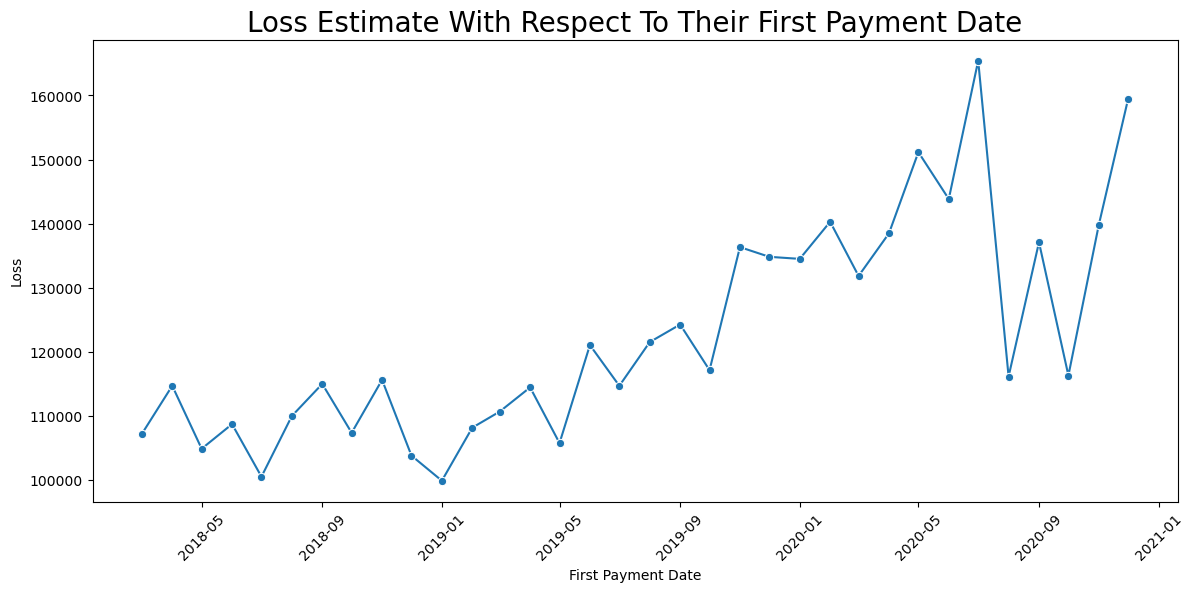

In [63]:
BadAcc['First Payment Date'] = pd.to_datetime(BadAcc['First Payment Date'])


grouped_data = BadAcc.groupby('First Payment Date')['LossEstimate'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='First Payment Date', y='LossEstimate', data=grouped_data,marker='o',palette='Set2')
plt.title('Loss Estimate With Respect To Their First Payment Date',fontsize=20)
plt.xlabel('First Payment Date')
plt.ylabel('Loss')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
